In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import fastai
import torch
import platform
from fastai.vision import *
from fastai.metrics import error_rate

In [10]:
fastai.__version__

'1.0.60'

In [11]:
torch.__version__

'1.4.0'

In [12]:
platform.sys.version

'3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) \n[GCC 7.3.0]'

In [13]:
inputPath = Path('../../../input/Lesson1')
inputPath.ls()

[PosixPath('../../../input/Lesson1/.ipynb_checkpoints'),
 PosixPath('../../../input/Lesson1/train'),
 PosixPath('../../../input/Lesson1/valid')]

In [14]:
!rm -r '../../../input/Lesson1/.ipynb_checkpoints'

In [15]:
outputPath = Path('../../../output/Lesson1')
outputPath.ls()

[PosixPath('../../../output/Lesson1/models')]

In [16]:
!rm -r '../../../output/Lesson1/.ipynb_checkpoints'

rm: cannot remove '../../../output/Lesson1/.ipynb_checkpoints': No such file or directory


In [17]:
doc(ImageDataBunch.from_folder)

from_folder [source] [test] from_folder ( path : PathOrStr , train : PathOrStr = 'train' , valid : PathOrStr = 'valid' , test : Union [ Path , str , NoneType ]= None , valid_pct = None , seed : int = None , classes : Collection = None , ** kwargs : Any ) → ImageDataBunch 
 
 × Tests found for from_folder : pytest -sv tests/test_vision_data.py::test_from_folder [source] To run tests please refer to this guide . Create from imagenet style dataset in path with train , valid , test subfolders (or provide valid_pct ). 
 Show in docs

In [36]:
tfms = get_transforms(do_flip=False)
size = 224
bs = 16

/home/onepanel/.conda/lib/python3.6/site-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


In [ ]:
data = ImageDataBunch.from_folder(inputPath, ds_tfms=tfms, size=size, bs=bs).normalize(imagenet_stats)

In [37]:
data = (ImageList.from_folder(inputPath)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=size)
        .databunch()
        .normalize(imagenet_stats))

/home/onepanel/.conda/lib/python3.6/site-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


In [42]:
data = (ImageList.from_folder(inputPath)
        .split_none()          
        .label_from_folder()
        .transform(tfms, size=size)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [43]:
data.batch_size

16

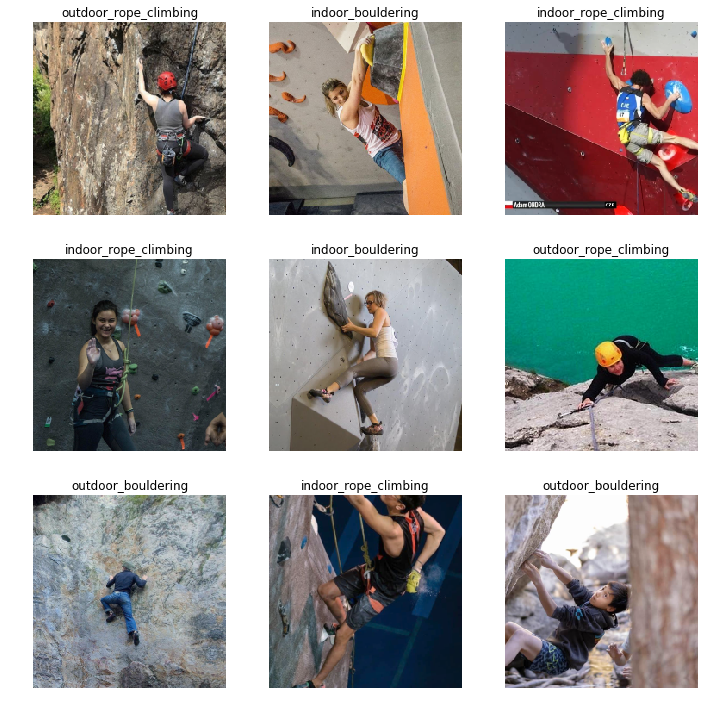

In [44]:
data.show_batch(ds_type=DatasetType.Train, rows=3, figsize=(10,10))

In [45]:
data.show_batch(ds_type=DatasetType.Valid, rows=3, figsize=(10,10))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [46]:
print(data.classes)
len(data.classes),data.c

['indoor_bouldering', 'indoor_rope_climbing', 'outdoor_bouldering', 'outdoor_rope_climbing']


(4, 4)

In [47]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [48]:
learn.path = outputPath

In [49]:
learn.fit_one_cycle(2)

In [50]:
learn.save('climbing-classifier-stage-1')

In [51]:
learn.path

PosixPath('../../../output/Lesson1')

In [52]:
learn.model_dir

'models'

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/onepanel/.conda/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/onepanel/.conda/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/onepanel/.conda/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/onepanel/.conda/lib/python3.6/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/onepanel/.conda/lib/python3.6/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/onepanel/.conda/lib/python3.6/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/home/onepanel/.conda/lib/python3.6/site-packages/fastai/data_block.py", line 75, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0


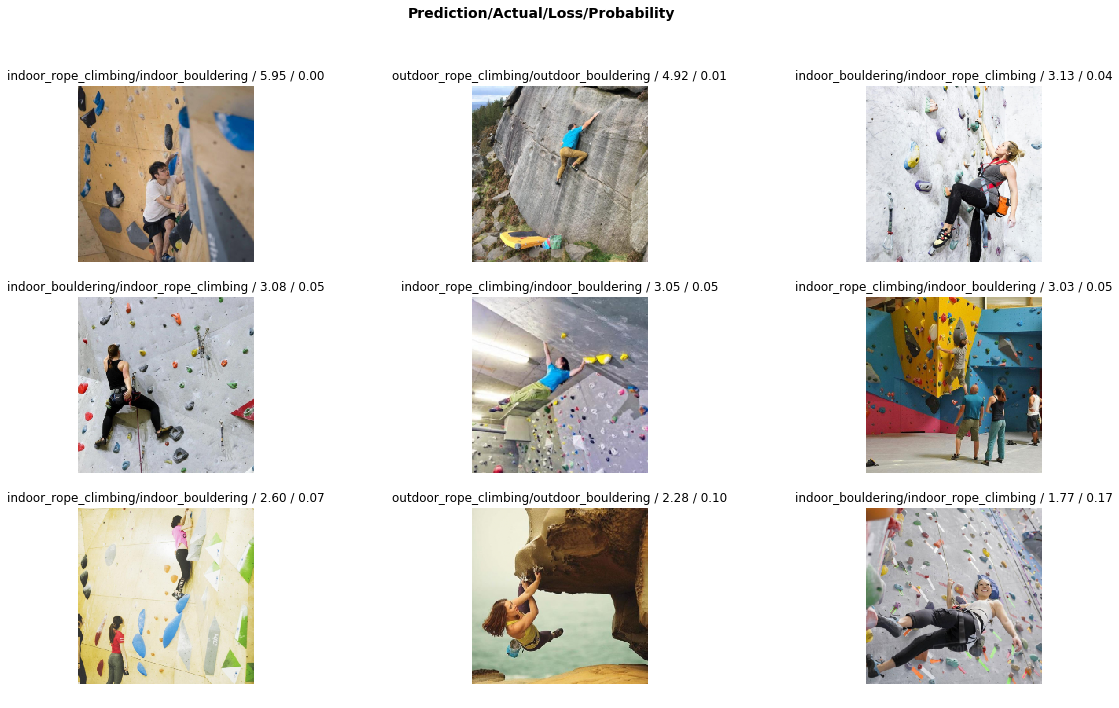

In [28]:
interp.plot_top_losses(9, figsize=(20,11))

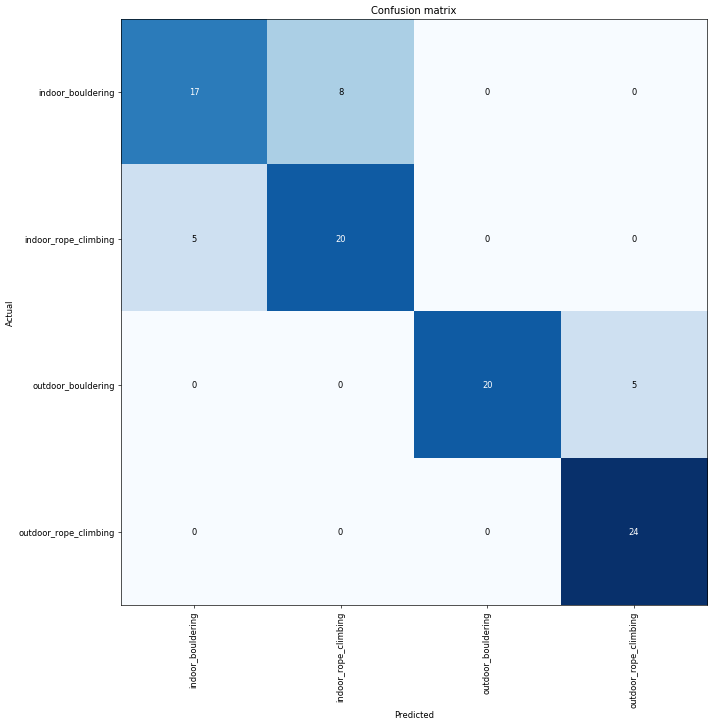

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [30]:
interp.most_confused(min_val=1)

[('indoor_bouldering', 'indoor_rope_climbing', 8),
 ('indoor_rope_climbing', 'indoor_bouldering', 5),
 ('outdoor_bouldering', 'outdoor_rope_climbing', 5)]

In [31]:
doc(learn.lr_find)

lr_find [source] [test] lr_find ( learn : Learner , start_lr : Floats = 1e-07 , end_lr : Floats = 10 , num_it : int = 100 , stop_div : bool = True , wd : float = None ) 
 
 × Tests found for lr_find : pytest -sv tests/test_train.py::test_lr_find [source] pytest -sv tests/test_vision_train.py::test_lrfind [source] To run tests please refer to this guide . Explore lr from start_lr to end_lr over num_it iterations in learn . If stop_div , stops when loss diverges. 
 Show in docs

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


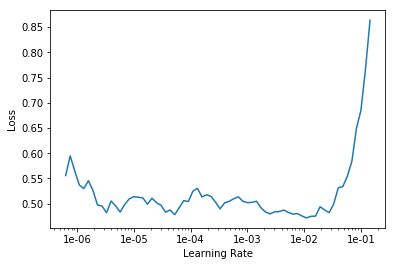

In [55]:
learn.recorder.plot()